In [36]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [38]:
from keras import Input
from keras.callbacks import ModelCheckpoint


In [39]:
data.shape

(392, 224, 224, 3)

In [40]:
target.shape

(392,)

In [41]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [42]:
train_data.shape

(352, 224, 224, 3)

In [43]:
test_data.shape

(40, 224, 224, 3)

In [44]:
train_target.shape

(352,)

Text(0.5, 1.0, 'Ground Truth : 0')

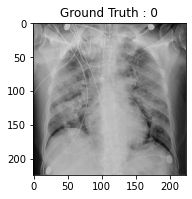

In [45]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_data[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_target[0]))

Text(0.5, 1.0, 'Ground Truth : 1')

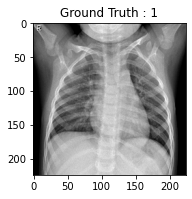

In [46]:
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_data[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_target[0]))

In [49]:
s=set()
for i in test_target:
    s.add(i)

In [50]:
len(s)

2

In [51]:
dim_data = np.prod(train_data.shape[1:])
train_images = train_data.reshape(train_data.shape[0], dim_data)
test_images = test_data.reshape(test_data.shape[0], dim_data)


In [52]:
print(train_images.shape)
print(test_images.shape)

(352, 150528)
(40, 150528)


In [53]:
from keras.utils import np_utils
Y_train= np_utils.to_categorical(train_target)
Y_test=np_utils.to_categorical(test_target)


In [59]:
#Training part using MLP
import tensorflow as tf
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [60]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               77070848  
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 77,243,393
Trainable params: 77,243,393
Non-trainable params: 0
_________________________________________________________________


In [61]:
hist = model.fit(train_images,train_target,epochs=10,validation_split=0.1,batch_size=64)

Train on 316 samples, validate on 36 samples
Epoch 1/10
316/316 [==============================] - 23s 72ms/step - loss: 33.2965 - accuracy: 0.5000 - val_loss: 8.6397 - val_accuracy: 0.4722
Epoch 2/10
316/316 [==============================] - 12s 36ms/step - loss: 10.6738 - accuracy: 0.5253 - val_loss: 0.6702 - val_accuracy: 0.8611
Epoch 3/10
316/316 [==============================] - 11s 35ms/step - loss: 2.5838 - accuracy: 0.7911 - val_loss: 0.6389 - val_accuracy: 0.8611
Epoch 4/10
316/316 [==============================] - 9s 27ms/step - loss: 0.9823 - accuracy: 0.9146 - val_loss: 1.8933 - val_accuracy: 0.7500
Epoch 5/10
316/316 [==============================] - 10s 31ms/step - loss: 0.9288 - accuracy: 0.9114 - val_loss: 3.6962 - val_accuracy: 0.7500
Epoch 6/10
316/316 [==============================] - 9s 28ms/step - loss: 0.5164 - accuracy: 0.9272 - val_loss: 0.3265 - val_accuracy: 0.9444
Epoch 7/10
316/316 [==============================] - 7s 21ms/step - loss: 0.7428 - accurac

In [62]:
model.save("weights using MLP")

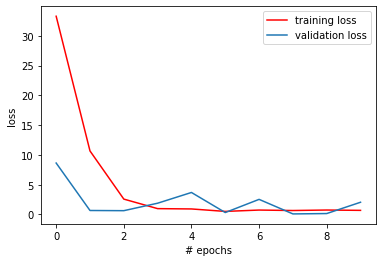

In [63]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

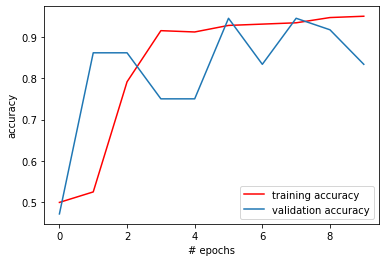

In [64]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [65]:
print(model.evaluate(test_images,test_target))

40/40 [==============================] - 1s 19ms/step
[1.0904772520065307, 0.875]


In [66]:
from sklearn import metrics

In [67]:
y_pred=model.predict(test_images)

In [68]:
y_pred.shape

(40, 1)

In [69]:
y_pred=y_pred.reshape(-1)

In [70]:
final_pred=[]
for i in range(y_pred.shape[0]):
    if y_pred[i]<=0.5:
        final_pred.append(0)
    else:
        final_pred.append(1)

In [71]:
final_pred=np.array(final_pred)

In [72]:
import itertools

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, final_pred)

In [74]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [75]:
cm_plot_labels = ['covid_positive','covid_negative']

Confusion matrix, without normalization
[[16  5]
 [ 0 19]]


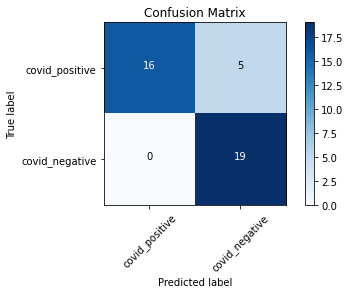

In [76]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [77]:
from sklearn.metrics import classification_report
target_names=['class 0','class 1']
print(classification_report(test_target,final_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.76      0.86        21
     class 1       0.79      1.00      0.88        19

    accuracy                           0.88        40
   macro avg       0.90      0.88      0.87        40
weighted avg       0.90      0.88      0.87        40



In [79]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

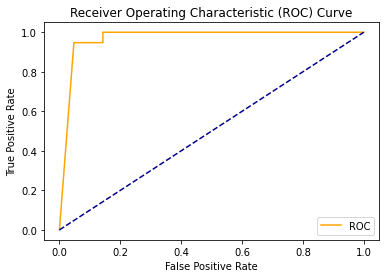

In [90]:
fper, tper, threshold = roc_curve(test_target, y_pred)
plot_roc_cur(fper, tper)

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_target,y_pred)

0.9699248120300752